In [1]:
class Neural_Network(object):
    def __init__(self):#, n_hidden, eta, epochs): 
        pass 
        
    @staticmethod
    def norm_matrix(matrix):
        matrix_transpose = list(zip(*matrix))
        matrix_empty = []
        for m in range(len(matrix_transpose)):
            normed_row = [abs(list(zip(*X))[m][x])/max(list(zip(*X))[m]) for x in range(len(list(zip(*X))[m]))]
            matrix_empty.append(normed_row)
        normed_matrix = list(zip(*matrix_empty))
        return normed_matrix
    
    @staticmethod
    def random_number():
        import datetime    
        my_dt_ob = datetime.datetime.now()
        date_list = [my_dt_ob.year, my_dt_ob.month, my_dt_ob.day, my_dt_ob.hour, my_dt_ob.minute, my_dt_ob.second, my_dt_ob.microsecond]     
        dt_random_num = date_list[6]**(1/(date_list[5]+0.0001))*date_list[4]
        return dt_random_num  
    
    @staticmethod
    def random_list_generator(list_len):
        my_random_list = []
        for i in range(list_len):
            my_random_list_i = (i+1)*(Neural_Network.random_number()*(i+1)-i*2)
            my_random_list.append(my_random_list_i-round(my_random_list_i))
        return my_random_list
   
    @staticmethod
    def random_matrix_generator(rows_len, cols_len):
        my_random_chain = Neural_Network.random_list_generator(rows_len * cols_len)   
        nev = [my_random_chain[i:i+cols_len] for i in range(0,len(my_random_chain), cols_len)]
        return nev
    
    @staticmethod
    def sigmoid(z):
        #from math import exp
        exp = 2.71828182845904523536028747135266249775724709369995
        return 1/(1+exp**(-z))
    
    @staticmethod
    def sigmoid_prime(z):
        #from math import exp
        exp = 2.71828182845904523536028747135266249775724709369995
        return exp**(-z)/((1+exp**(-z))**2)

    @staticmethod
    def matrix_multiple(a,b):
        zip_b = zip(*b)
        zip_b = list(zip_b)
        return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
                 for col_b in zip_b] for row_a in a]
    
    @staticmethod
    def matrix_diff(matrix1, matrix2):   
        empty_chain = [None]*len(matrix1)*len(matrix1[0])
        matrix_diff = [empty_chain[i:i+len(matrix1[0])] for i in range(0, len(empty_chain), len(matrix1[0]))]
        for i in range(len(matrix1)):
            for j in range(len(matrix1[0])):
                matrix_diff[i][j] = matrix1[i][j] - matrix2[i][j]
        return matrix_diff
    
    @staticmethod
    def num_matrix(n, matrix):
        return [list(map(lambda x: x*n, z)) for z in matrix]
    
    @staticmethod
    def initial_weights_matrix_generator( X, n_hidden):
        w_rows_list = [len(X[0])] + n_hidden
        w_cols_list = n_hidden +[len(Y[0])]
        w_dim_list = list(zip(w_rows_list, w_cols_list))
        initial_weights_matrix_list = []
        for i in range(len(w_dim_list)):
            W_i = Neural_Network.random_matrix_generator(w_dim_list[i][0], w_dim_list[i][1])
            initial_weights_matrix_list.append(W_i)
        return initial_weights_matrix_list
      
    @staticmethod
    def z_a_list_func(X, n_hidden, weights):
        z_initial = Neural_Network.matrix_multiple(X, weights[0])
        a_initial =  [*zip(*[[Neural_Network.sigmoid(z_initial[i][j]) for i in range(len(z_initial))] for j in range(len(z_initial[0]))])]

        z_list = []
        z_list.append(z_initial)

        a_list = []
        a_list.append(a_initial)

        for g in range(len(n_hidden)):
            z_g = Neural_Network.matrix_multiple(a_list[g], weights[g+1])
            z_list.append(z_g)
            a_g = [*zip(*[[Neural_Network.sigmoid(z_list[g+1][a][b]) for a in range(len(z_list[g+1]))] for b in range(len(z_list[g+1][0]))])]
            a_list.append(a_g)
        return z_list, a_list
    
    @staticmethod    
    def prime(n_hidden, z_list_):
        prime_list = []
        for p in range(len(n_hidden)+1):
            prime_list_p = [*zip(*[[Neural_Network.sigmoid_prime(z_list_[p][i][j]) for i in range(len(z_list_[p]))] for j in range(len(z_list_[p][0]))])]
            prime_list.append(prime_list_p)
        return prime_list
    
    @staticmethod    
    def discrepansy(Y, a_list_):
        discrepansy_list = []
        for yy in range(len(Y)):
            dis_i = Y[yy][0] - a_list_[-1][yy][0]
            discrepansy_list.append(dis_i)
        discrepansy_list = [discrepansy_list[i:i+len(Y[0])] for i in range(0,len(Y), len(Y[0]))]
        return discrepansy_list
    
    @staticmethod    
    def delta(Y, weights, discrepansy_, prime_):
        delta_last = [[discrepansy_[q][0]*prime_[-1][q][0] for q in range(len(Y))][i:i+len(Y[0])] for i in range(0,len(Y), len(Y[0]))] 
        delta_list = []
        delta_list.append(delta_last)
        for d in range(len(n_hidden)):
            delta_i = Neural_Network.matrix_multiple(delta_list[0], Neural_Network.matrix_multiple([*zip(*weights[-d-1])], prime_[-d-2]))
            delta_list.insert(0, delta_i)
        return delta_list
    
    @staticmethod    
    def dEdW( X, n_hidden, a_list_, delta_):
        dEdW_list = []
        corr_list = [X]+a_list_[0:len(a_list_)-1]
        for e in range(len(n_hidden)+1):
            dEdW_e = Neural_Network.matrix_multiple([*zip(*corr_list[e])], delta_[e])
            dEdW_list.append(dEdW_e)
        return dEdW_list
    
    @staticmethod    
    def weights_update(eta, weights, dEdW):
        w_updated_matrix = []
        for n in range(len(n_hidden)+1):
            w_updated_n = Neural_Network.matrix_diff(weights[n], Neural_Network.num_matrix(-eta, dEdW[n]))
            w_updated_matrix.append(w_updated_n)
        return  w_updated_matrix
    
    @staticmethod
    def calculus(X, Y, n_hidden, epochs, eta):
        
        X_normed = Neural_Network.norm_matrix(X)
        Y_normed = Neural_Network.norm_matrix(Y)
        
        w_list_total = []
        a_list_total= []
        z_list_total= []
        prime_list_total = []
        discrepansy_list_total = []
        delta_list_total = []
        dEdW_list_total = []

        #База индукции
        w_0 = Neural_Network.initial_weights_matrix_generator(X_normed, n_hidden)
        z_0, a_0 = Neural_Network.z_a_list_func(X_normed, n_hidden, w_0)
        p_0 = Neural_Network.prime(n_hidden, z_0)
        dis_0 = Neural_Network.discrepansy(Y_normed, a_0)
        del_0 = Neural_Network.delta(Y_normed, w_0, dis_0, p_0)
        dEdW_0 = Neural_Network.dEdW(X_normed, n_hidden, a_0, del_0)


        w_list_total.append(w_0)
        a_list_total.append(a_0)
        z_list_total.append(z_0)
        prime_list_total.append(p_0)
        discrepansy_list_total.append(dis_0)
        delta_list_total.append(del_0)
        dEdW_list_total.append(dEdW_0)

        for epoch in range(epochs):

            z_a_list_epoch = Neural_Network.z_a_list_func(X, n_hidden, w_list_total[epoch])
            a_list_total.append(z_a_list_epoch[0])
            z_list_total.append(z_a_list_epoch[1])

            prime_epoch = Neural_Network.prime(n_hidden, z_list_total[epoch])
            prime_list_total.append(prime_epoch)

            discrepansy_epoch = Neural_Network.discrepansy(Y_normed, a_list_total[epoch])
            discrepansy_list_total.append(discrepansy_epoch)

            delta_epoch = Neural_Network.delta(Y_normed, w_list_total[epoch], discrepansy_list_total[epoch], prime_list_total[epoch])
            delta_list_total.append(delta_epoch)

            dEdW_epoch = Neural_Network.dEdW(X_normed, n_hidden, a_list_total[epoch], delta_list_total[epoch])
            dEdW_list_total.append(dEdW_epoch)

            w_epoch = Neural_Network.weights_update(-eta, w_list_total[epoch], dEdW_list_total[epoch])
            w_list_total.append(w_epoch)

        return a_list_total, z_list_total, prime_list_total, discrepansy_list_total, delta_list_total, dEdW_list_total, w_list_total
    

In [2]:
X, Y = Neural_Network.random_matrix_generator(50, 7), Neural_Network.random_matrix_generator(50,1)

In [5]:
n_hidden = [4, 17, 10, 2]
epochs = 1000
eta = 0.004

In [6]:
%%time
NN_dis = Neural_Network.calculus(X, Y, n_hidden, epochs, eta)[3]

CPU times: total: 10 s
Wall time: 10 s


In [7]:
def MSE(NN_discrepansy):
    loss_list = []
    for loss in range(len(NN_discrepansy)):
        loss_epoch = 0.5*sum([(NN_discrepansy[loss][i][0])**2 for i in range(len(NN_discrepansy[loss]))])
        loss_list.append(loss_epoch)
    return loss_list

In [8]:
MSE_list = MSE(NN_dis)

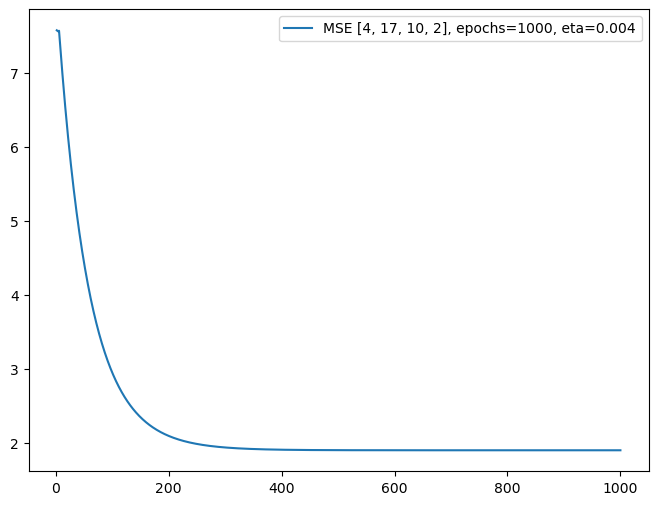

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(2, len(MSE(NN_dis))), MSE_list[2:len(MSE_list)], label=f'MSE {n_hidden}, epochs={epochs}, eta={eta}')
plt.legend()
plt.show()

# Другие функции активации

Функция для построения графиков:

In [28]:
def func_plot(range_, act_fun):
    range_ = range_
    list_ = []
    for r in range(len(range_ )):
        point = act_fun(range_[r])
        list_.append(point)
    return list_

## ReLu 

$$f(x) = x^+ = \max(0, x) = \frac{x+|x|}{2} = \begin{cases}
    x & \text{if } x > 0, \\
    0 & \text{otherwise}.
\end{cases}\\
f'(x) = \begin{cases}
    1 & \text{if } x > 0, \\
    0 & \text{if } x < 0.
\end{cases}$$

In [12]:
def ReLu(z):
    return z if z>0 else 0

In [30]:
def ReLu_prime(z):
    return 1 if z>=0 else 0

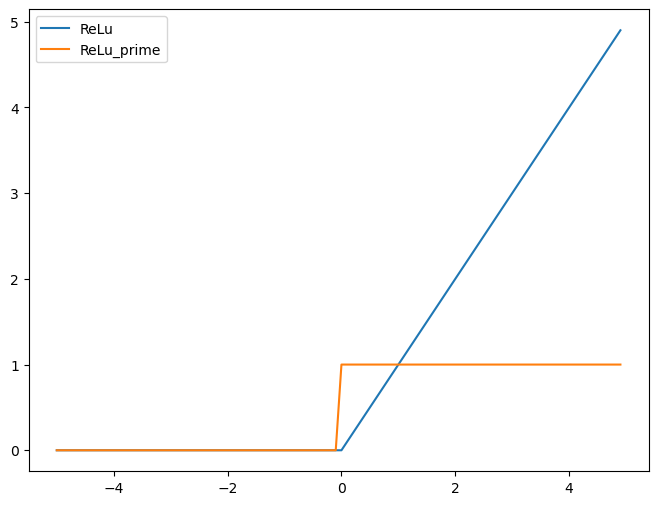

In [31]:
z = list(i/10 for i in range(-50,50))
r_list = []
r1_list = []
for k in range(len(z)):
    r = ReLu(z[k])
    r1 = ReLu_prime(z[k])
    r_list.append(r)
    r1_list.append(r1)
plt.figure(figsize=(8,6))
plt.plot(z, r_list , label=f'ReLu')
plt.plot(z, r1_list , label=f'ReLu_prime')
plt.legend()
plt.show()

## Гиперболический тангенс

$$f(x)=\operatorname{th}x=\frac{\operatorname{sh}x}{\operatorname{ch}x} = \frac {e^x - e^{-x}} {e^x + e^{-x}} = \frac{e^{2x} - 1} {e^{2x} + 1}=1-\frac {2} {e^{2x} + 1}$$

$$ f'(x)=1-\frac{4e^{2x}}{\left(e^{2x}+1\right)^2}$$

In [25]:
def tanh(z):
    from math import exp
    #exp = 2.71828182845904523536028747135266249775724709369995  
    return 1-2/(1+exp(2*z))

In [26]:
def tanh_prime(z):
    from math import exp
    #exp = 2.71828182845904523536028747135266249775724709369995  
    return 1-4*exp(2*z)/(1+exp(2*z))**2

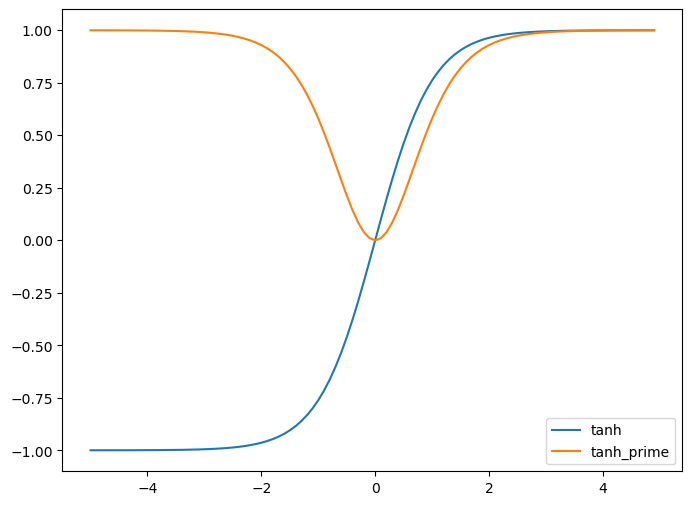

In [27]:
z = list(i/10 for i in range(-50,50))
r_list = []
r1_list = []
for k in range(len(z)):
    r = tanh(z[k])
    r1 = tanh_prime(z[k])
    r_list.append(r)
    r1_list.append(r1)
plt.figure(figsize=(8,6))
plt.plot(z, r_list , label=f'tanh')
plt.plot(z, r1_list , label=f'tanh_prime')
plt.legend()
plt.show()
